In [98]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('D:\Data\kaggle datasets\movie_IMDB.csv')

In [99]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [100]:
data.shape

(5043, 28)

In [101]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [103]:
data.isnull().sum().sort_values(ascending = False)[:5]

gross             884
budget            492
aspect_ratio      329
content_rating    303
plot_keywords     153
dtype: int64

In [104]:
data.dropna(how = 'any',axis = 0,inplace = True)

In [105]:
data.shape

(3756, 28)

In [106]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [107]:
num_data = data[numerical_features]
cat_data = data[categorical_features]

In [108]:
num_data.shape,cat_data.shape

((3756, 16), (3756, 12))

In [109]:
num_data.isnull().sum().sort_values(ascending = False)

movie_facebook_likes         0
aspect_ratio                 0
imdb_score                   0
actor_2_facebook_likes       0
title_year                   0
budget                       0
num_user_for_reviews         0
facenumber_in_poster         0
cast_total_facebook_likes    0
num_voted_users              0
gross                        0
actor_1_facebook_likes       0
actor_3_facebook_likes       0
director_facebook_likes      0
duration                     0
num_critic_for_reviews       0
dtype: int64

In [110]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000


In [111]:
num_data.drop(['title_year'],axis = 1, inplace = True)


In [112]:
numerical_features = numerical_features.drop('title_year')

In [113]:
numerical_features.size

15

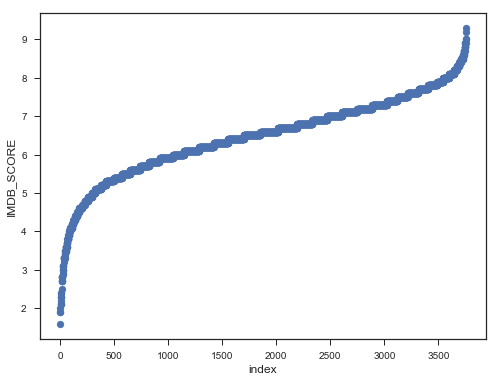

In [114]:
plt.figure(figsize=(8,6))
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('IMDB_SCORE', fontsize=12)
plt.show()

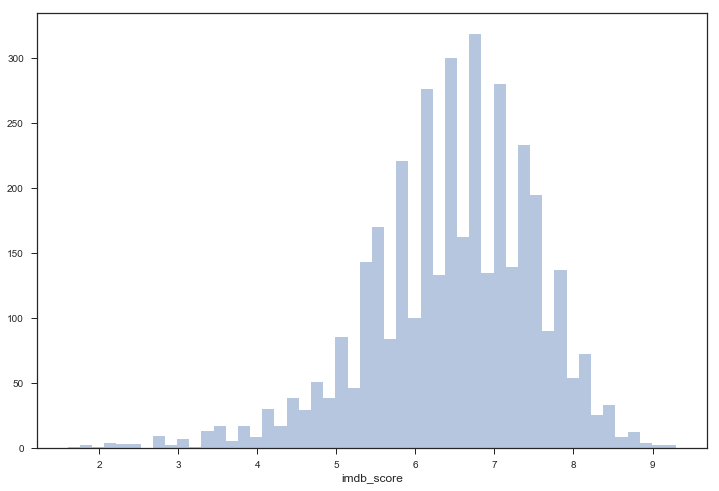

In [115]:
plt.figure(figsize=(12,8))
sns.distplot(num_data.imdb_score.values, bins=50, kde=False)
plt.xlabel('imdb_score', fontsize=12)
plt.show()

In [116]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [117]:
np.floor((num_data.shape[1]/3))

5.0

In [118]:
def scatter_with_IMDB(num_data):
    sns.set(style="ticks")
    
    fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows= (num_data.shape[1]/3 + 1))
    col = 0
    row = 0
    for feat in num_data.columns.tolist():
        ax[row,col].set(ylabel='IMDB Score', xlabel=feat)
        ax[row,col].scatter(x=num_data[feat], y=num_data['imdb_score'], color="b")
        col = col + 1
        if (col == 3):
            col = 0
            row = row + 1
        

               This shall give you an idea about relation of predictiong variable with individual variables
                            We can see that spread of data is very right skewed and there are outliers

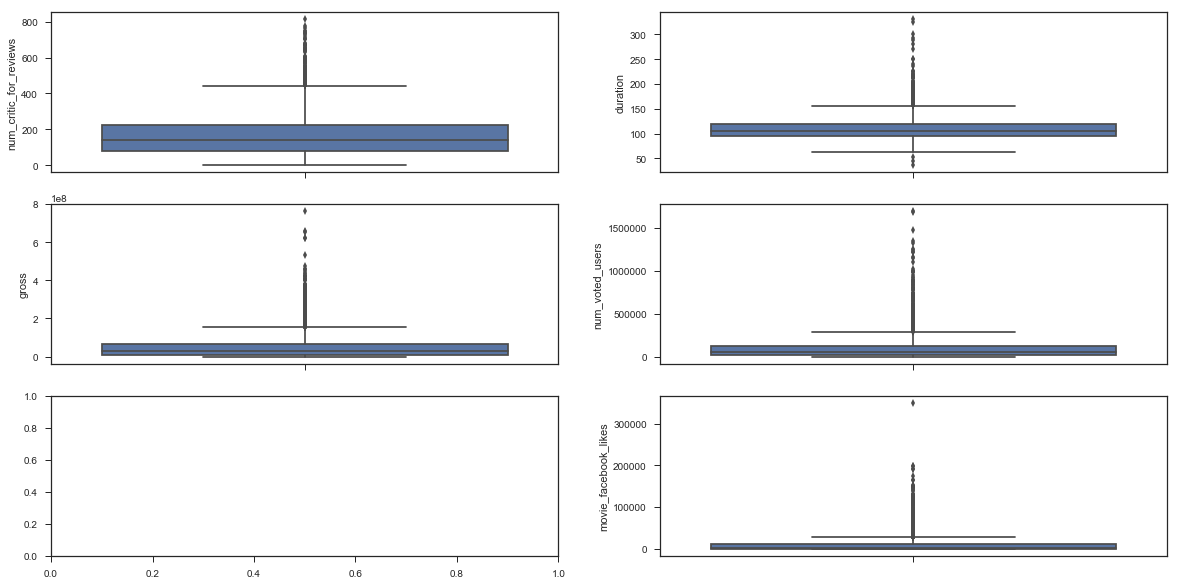

In [119]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=3)
sns.set_style("whitegrid")
#sns.boxplot(x="imdb_score", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="num_critic_for_reviews", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="duration", data=num_data,orient = 'v',ax = ax[0][1])
#sns.boxplot(x="director_facebook_likes", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="gross", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="num_voted_users", data=num_data,orient = 'v',ax = ax[1][1])
#sns.boxplot(x="num_user_for_reviews", data=num_data,orient = 'v',ax = ax[2][0])
#sns.boxplot(x="title_year", data=num_data,orient = 'v',ax = ax[2][1])
sns.boxplot(x="movie_facebook_likes", data=num_data,orient = 'v',ax = ax[2][1])


# Outliers

In [120]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [121]:
# outliers = num_data[(num_data['num_voted_users'] >200000) | (num_data['num_voted_users'] < 1000)].index
# outliers.size

# num_data.drop(outliers,inplace = True)
# cat_data.drop(outliers,inplace = True)

# sns.distplot(num_data['num_voted_users'])

In [122]:
test = outliers_iqr(num_data['imdb_score'])

In [123]:
test = list(test)

In [124]:
num_data.drop(num_data.index[test],inplace = True)
cat_data.drop(cat_data.index[test],inplace = True)

I am removing any instances that has less than 10k of number of voted users because number of voted users is most related to IMDB Score as seen in corealtion matrix so having less than 10k will not give you true picture

In [125]:
a = num_data[(num_data.num_voted_users < 10000)].index

In [126]:
num_data.drop(a,inplace = True)
cat_data.drop(a,inplace = True)

In [127]:
num_data.shape

(3167, 15)

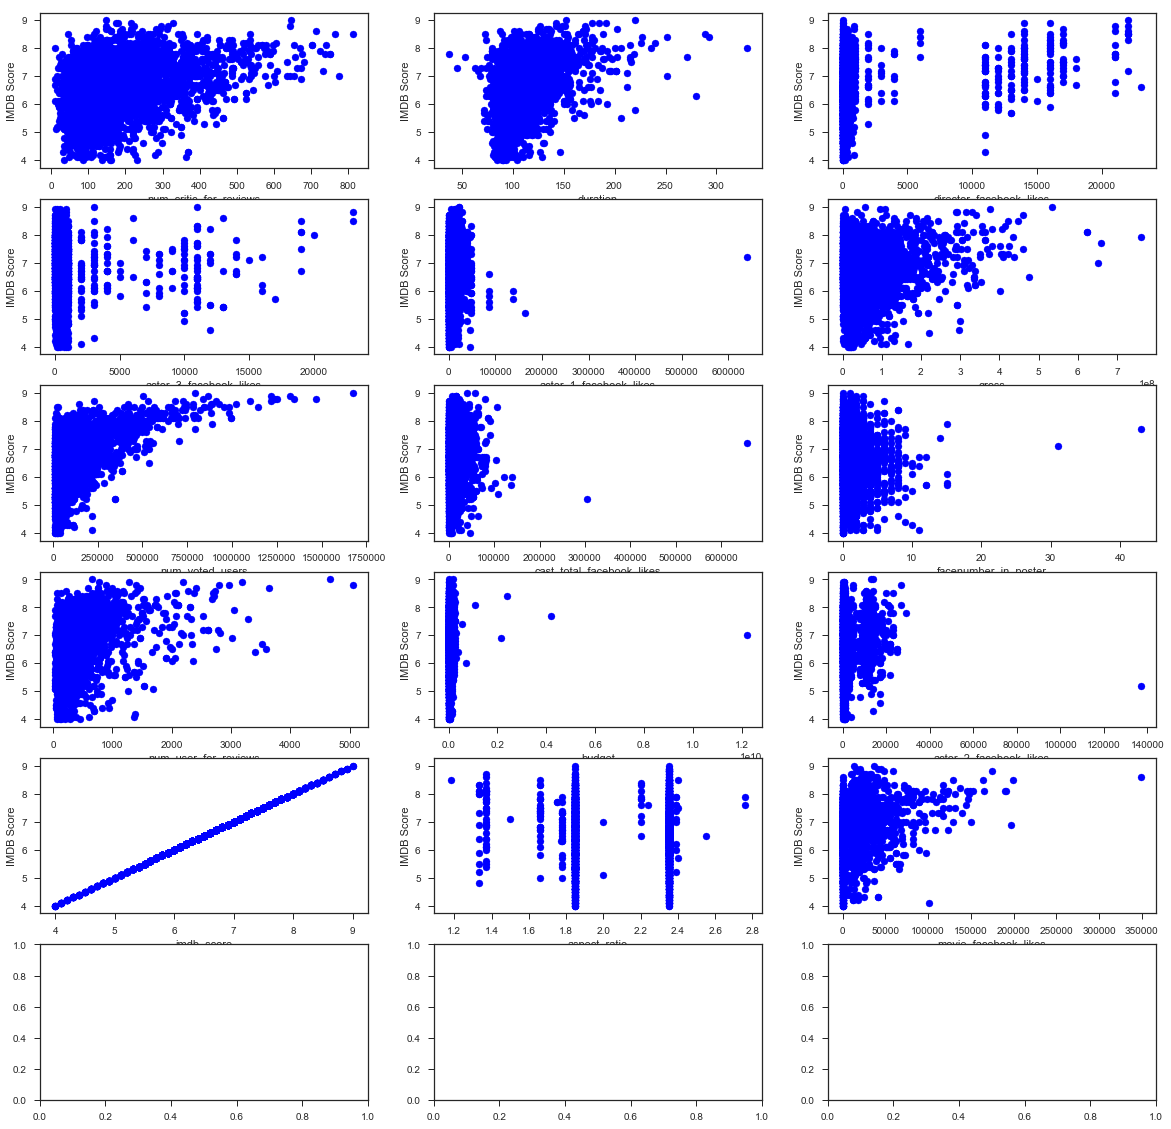

In [128]:
scatter_with_IMDB(num_data)

We shall instantly remove actor_3_facebook_likes, actor_1_facebook_likes, cast_total_facebook_likes, facenumber_in_poster, budget, actor_2_facebook_likes, aspect_ratio

Lets cross check with corelation matrix once

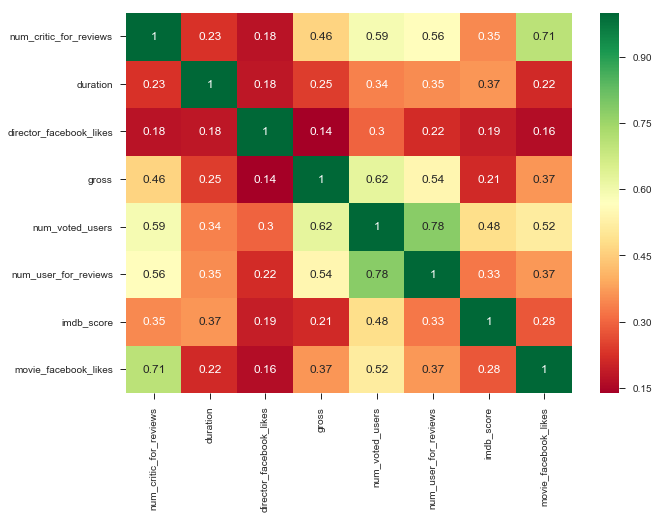

In [129]:
# most correlated features
import seaborn as sns
corrmat = num_data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [130]:
corrmat.sort_values(["imdb_score"], ascending = False, inplace = True)
print(corrmat.imdb_score)

imdb_score                   1.000000
num_voted_users              0.514526
duration                     0.371942
num_user_for_reviews         0.333493
num_critic_for_reviews       0.309514
movie_facebook_likes         0.285769
director_facebook_likes      0.203727
gross                        0.185152
cast_total_facebook_likes    0.079889
actor_2_facebook_likes       0.079078
actor_1_facebook_likes       0.069796
actor_3_facebook_likes       0.049147
budget                       0.018063
aspect_ratio                -0.019651
facenumber_in_poster        -0.050432
Name: imdb_score, dtype: float64


In [131]:
corrmat.index[abs(corrmat['imdb_score']) > 0.3].tolist()

['imdb_score',
 'num_voted_users',
 'duration',
 'num_user_for_reviews',
 'num_critic_for_reviews']

In [132]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [133]:
num_data.drop([
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'actor_2_facebook_likes',
 'aspect_ratio'],inplace = True,axis = 1)

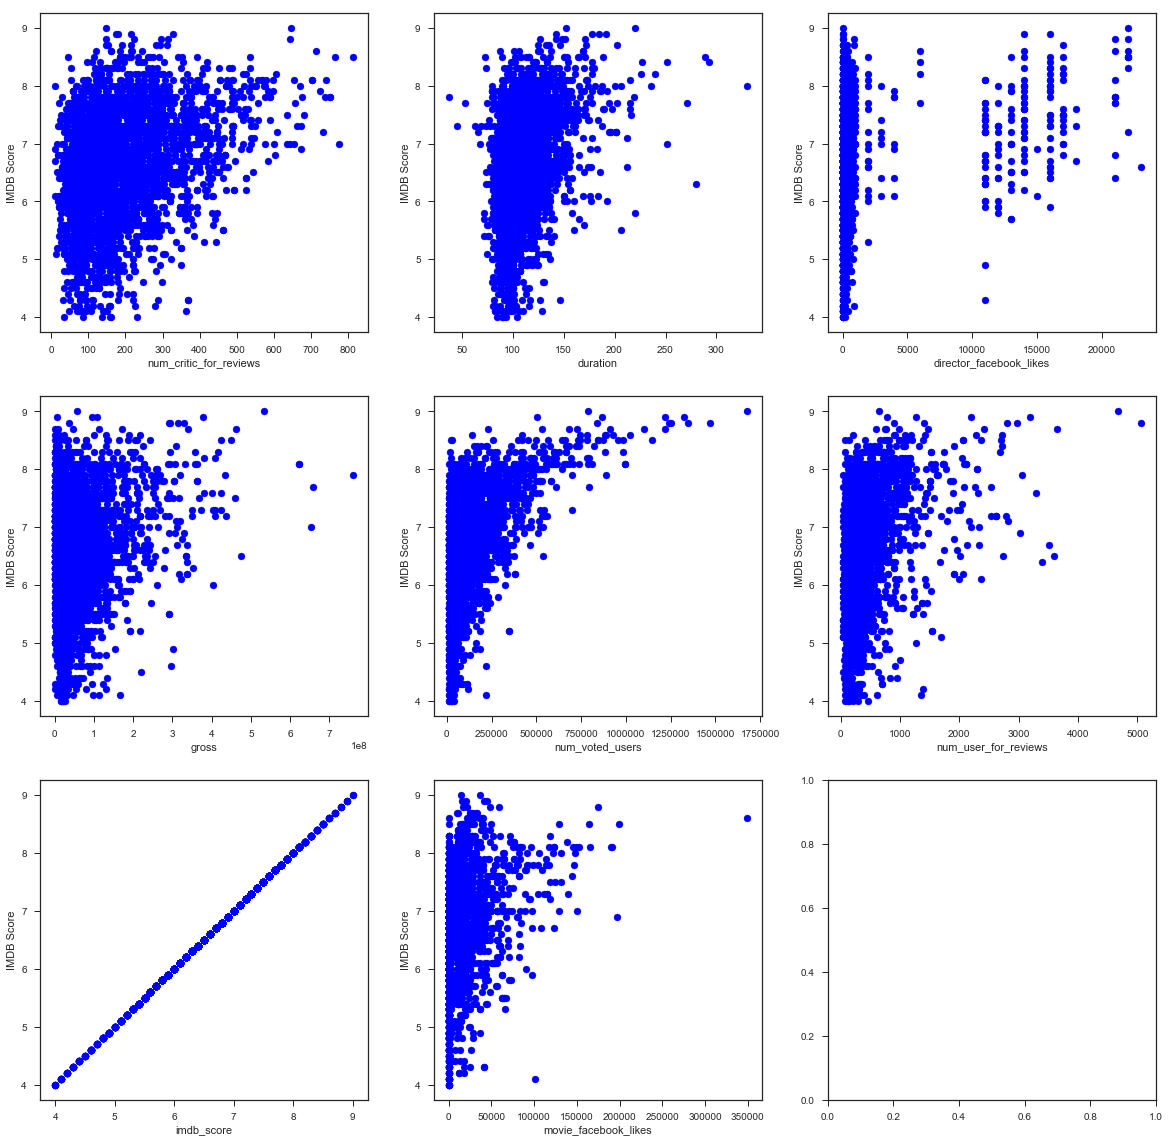

In [134]:
scatter_with_IMDB(num_data)

In [135]:
# c=np.setxor1d(num_data.index.values,test)

# # c=np.intersect1d(num_data.index.values,test)
# num_data = num_data.loc[c,:]


In [136]:
num_data.isnull().sum().sort_values(ascending = False)

movie_facebook_likes       0
imdb_score                 0
num_user_for_reviews       0
num_voted_users            0
gross                      0
director_facebook_likes    0
duration                   0
num_critic_for_reviews     0
dtype: int64

In [137]:
num_data.median()

num_critic_for_reviews          159.0
duration                        107.0
director_facebook_likes          79.0
gross                      36874745.0
num_voted_users               68935.0
num_user_for_reviews            248.0
imdb_score                        6.7
movie_facebook_likes              0.0
dtype: float64

## Imputing NaN with Median (Because data has outliers)

In [138]:
num_data.fillna(num_data.median(),inplace = True)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,760505847.0,886204,3054.0,7.9,33000
1,302.0,169.0,563.0,309404152.0,471220,1238.0,7.1,0
2,602.0,148.0,0.0,200074175.0,275868,994.0,6.8,85000
3,813.0,164.0,22000.0,448130642.0,1144337,2701.0,8.5,164000
5,462.0,132.0,475.0,73058679.0,212204,738.0,6.6,24000
6,392.0,156.0,0.0,336530303.0,383056,1902.0,6.2,0
7,324.0,100.0,15.0,200807262.0,294810,387.0,7.8,29000
8,635.0,141.0,0.0,458991599.0,462669,1117.0,7.5,118000
9,375.0,153.0,282.0,301956980.0,321795,973.0,7.5,10000
10,673.0,183.0,0.0,330249062.0,371639,3018.0,6.9,197000


### Categorical Variable Genre 

In [139]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )

df_genres = df_genres.reindex(cat_data.index)


cat_data.drop('genres',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [140]:
cat_data.shape

(3167, 19)

### Plot Keywords Handling

In [141]:
df_plot_keywords = pd.DataFrame(cat_data['plot_keywords'])
df_plot_keywords = pd.DataFrame(df_plot_keywords.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
df_plot_keywords = df_plot_keywords.reindex(cat_data.index)
cat_data = cat_data.merge(df_plot_keywords,left_index = True,right_index = True)

In [142]:
cat_data.head(2)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore


In [143]:
cat_data.shape

(3167, 23)

### Filling NaN values in Categorical Features with Mode

In [144]:
# cat_data = data[categorical_features]

In [145]:
# # from sklearn.preprocessing import Imputer
# # imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# # imr = imr.fit(cat_data)
# # cat_data = imr.transform(cat_data.values)
# cat_data.fillna(cat_data.mode(),inplace = True)
# cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [146]:

# cat_data = cat_data.loc[:,['color',
#  'Genre_5',
#  'Genre_4',
#  'Genre_3',
#  'content_rating',
#  'Genre_0',
#  'Genre_2',
#  'Genre_1',
#  'language',
#  'country']]

# fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows=3)
# sns.countplot(data = cat_data, x= 'color', ax = ax[0][0])
# sns.countplot(data = cat_data, x= 'language', ax = ax[0][1])
# sns.countplot(data = cat_data, x= 'country', ax = ax[1][0])
# sns.countplot(data = cat_data, x= 'content_rating', ax = ax[1][1])
# sns.countplot(data = cat_data, x= 'Genre_0', ax = ax[2][0])
# sns.countplot(data = cat_data, x= 'Genre_1', ax = ax[2][1])
# sns.countplot(data = cat_data, x= 'Genre_2', ax = ax[2][2])
# sns.countplot(data = cat_data, x= 'Genre_3', ax = ax[0][2])
# sns.countplot(data = cat_data, x= 'Genre_4', ax = ax[1][2])
# sns.countplot(data = cat_data, x= 'Genre_5', ax = ax[1][1])

In [147]:
cat_data.nunique().sort_values()


color                 2
Genre_7               3
Genre_6               9
Genre_5              11
content_rating       12
Genre_4              16
Genre_0              16
Genre_3              17
Genre_2              20
Genre_1              21
language             29
country              41
actor_1_name       1174
plot_keywords_0    1257
director_name      1294
plot_keywords_4    1422
plot_keywords_1    1493
plot_keywords_3    1515
plot_keywords_2    1576
actor_2_name       1834
actor_3_name       2220
movie_title        3069
movie_imdb_link    3070
dtype: int64

In [148]:
cat_data.columns

Index([u'color', u'director_name', u'actor_2_name', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'movie_imdb_link', u'language',
       u'country', u'content_rating', u'Genre_0', u'Genre_1', u'Genre_2',
       u'Genre_3', u'Genre_4', u'Genre_5', u'Genre_6', u'Genre_7',
       u'plot_keywords_0', u'plot_keywords_1', u'plot_keywords_2',
       u'plot_keywords_3', u'plot_keywords_4'],
      dtype='object')

In [149]:
cat_data.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

## Split Data before doing any transformations

In [150]:
whole_data = pd.concat([num_data,cat_data],axis = 1)

In [151]:
y = whole_data['imdb_score']

In [152]:
whole_data.drop('imdb_score',axis = 1,inplace = True)

In [153]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(whole_data,y, random_state = 0,test_size = 0.20) # test_size = 0.10

In [154]:
num_feat = whole_data.select_dtypes(exclude=['object']).columns.tolist()
cat_feat = whole_data.select_dtypes(include=['object']).columns.tolist()

In [155]:
X_train_num = X_train[num_feat]

X_train_cat = X_train[cat_feat]

In [156]:
X_test_num = X_test[num_feat]

X_test_cat = X_test[cat_feat]

# Skewness

In [157]:
from scipy.stats import skew 
skewness = X_train_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_train_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_train_num[skewness.index] = skew_features

In [158]:
X_train_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,num_user_for_reviews,movie_facebook_likes
2803,5.529429,4.927254,4.969813,15.512927,11.438008,5.771441,8.517393
371,5.293305,4.736198,5.402677,18.420869,11.959846,5.942799,0.000000
1080,3.688879,4.787492,6.295266,18.338551,10.732018,4.553877,6.908755
2493,5.648974,4.394449,6.416732,11.349959,11.914483,6.735780,0.000000
1217,4.836282,5.332719,0.000000,18.069782,11.639320,6.093570,0.000000


## Standardize 

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [160]:
# X_train_num_scaled['reviews_and_users'] = (X_train_num_scaled['num_critic_for_reviews'] + X_train_num_scaled['num_voted_users'] + X_train_num_scaled['num_user_for_reviews'])/3

In [161]:
for i, col in enumerate(num_feat):
    X_train_num.loc[:,col] = X_train_num_scaled[:, i]

In [162]:
# X_train_num['reviews_and_users'] = X_train_num[['num_critic_for_reviews','num_voted_users','num_user_for_reviews']].sum(axis = 1)/3

## Transformations on Numeric Test data

In [163]:
from scipy.stats import skew 
skewness = X_test_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.75]
skew_features = X_test_num[skewness.index]
skew_features  = np.log1p(skew_features)
X_test_num[skewness.index] = skew_features

In [164]:
X_test_num_scaled = scaler.transform(X_test_num)

In [165]:
for i, col in enumerate(num_feat):
    X_test_num.loc[:,col] = X_test_num_scaled[:, i]

In [166]:
# X_test_num['reviews_and_users'] = X_test_num[['num_critic_for_reviews','num_voted_users','num_user_for_reviews']].sum(axis = 1)/3

# X_test_num.drop(['num_critic_for_reviews','num_voted_users','num_user_for_reviews'],axis = 1,inplace = True)
# X_train_num.drop(['num_critic_for_reviews','num_voted_users','num_user_for_reviews'],axis = 1,inplace = True)


## Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train_num, y_train)
dt_score_train = dt.score(X_train_num, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test_num, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.91482716617793314)
('Testing score: ', 0.40997001899842678)


### Numerical Feature Importance

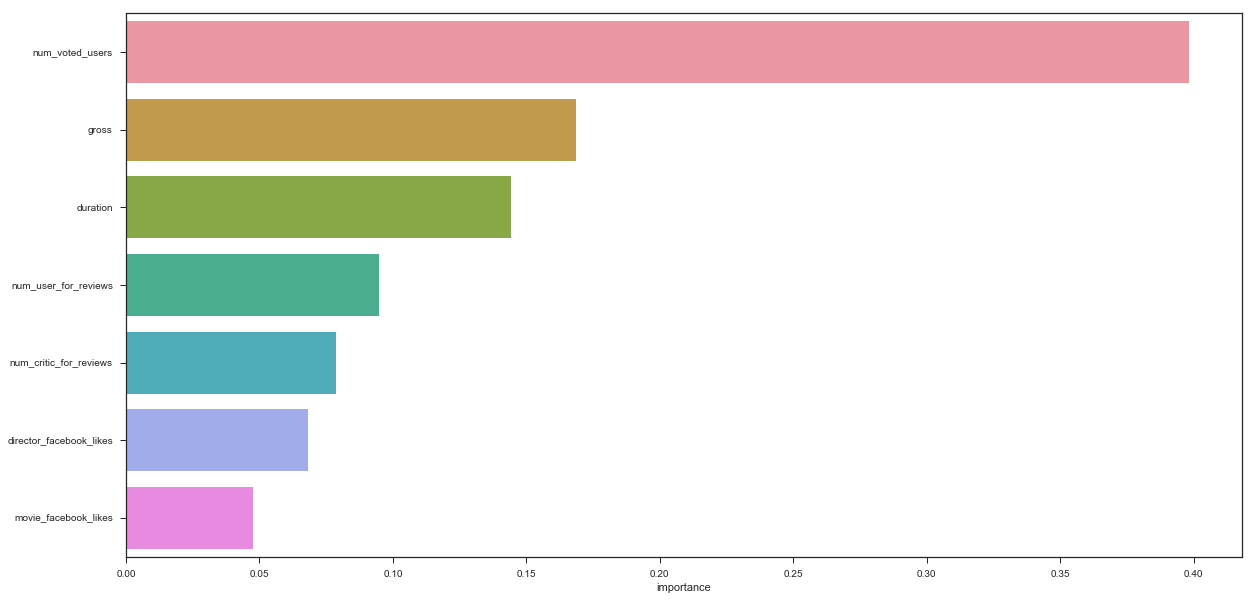

In [125]:
df = pd.DataFrame(data = dt.feature_importances_,index = X_train_num.columns.tolist())

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

                          looks like number of voter users and duration has lot to say about imdb_score

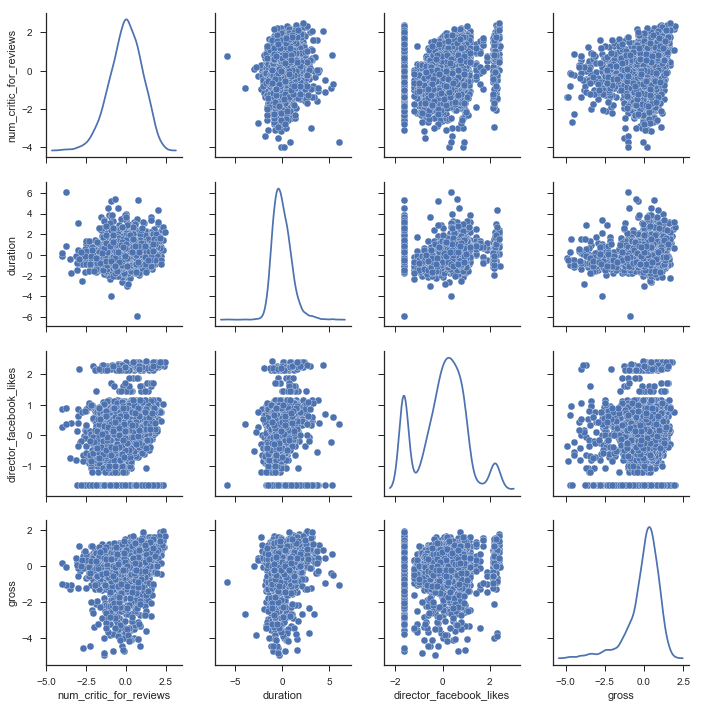

In [126]:
sns.set(style="ticks")
sns.pairplot(X_train_num.iloc[:,:4],diag_kind="kde")

### Tried Target Encoding for categorical features ;(

In [127]:
train_tar_enc = pd.concat([X_train_cat,y_train],axis = 1)
test_tar_enc = pd.concat([X_test_cat,y_test],axis = 1)

In [128]:
train_tar_enc.head(1)

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4,imdb_score
2803,Color,Todd Field,Noah Emmerich,Kate Winslet,Little Children,Jane Adams,English,USA,R,Horror,None,None,None,None,None,boy in a bathtub,demon,laptop computer,pulled underwater,walking in the dark,7.6


In [129]:
# # This way we have randomness and are able to reproduce the behaviour within this cell.
# np.random.seed(13)
# from sklearn.model_selection import KFold
# def impact_coding(data, feature, target='imdb_score'):
#     '''
#     In this implementation we get the values and the dictionary as two different steps.
#     This is just because initially we were ignoring the dictionary as a result variable.
    
#     In this implementation the KFolds use shuffling. If you want reproducibility the cv 
#     could be moved to a parameter.
#     '''
#     n_folds = 20
#     n_inner_folds = 10
#     impact_coded = pd.Series()
    
#     oof_default_mean = data[target].mean() # Gobal mean to use by default (you could further tune this)
#     kf = KFold(n_splits=n_folds, shuffle=True)
#     oof_mean_cv = pd.DataFrame()
#     split = 0
#     for infold, oof in kf.split(data[feature]):
#             impact_coded_cv = pd.Series()
#             kf_inner = KFold(n_splits=n_inner_folds, shuffle=True)
#             inner_split = 0
#             inner_oof_mean_cv = pd.DataFrame()
#             oof_default_inner_mean = data.iloc[infold][target].mean()
#             for infold_inner, oof_inner in kf_inner.split(data.iloc[infold]):
#                 # The mean to apply to the inner oof split (a 1/n_folds % based on the rest)
#                 oof_mean = data.iloc[infold_inner].groupby(by=feature)[target].mean()
#                 impact_coded_cv = impact_coded_cv.append(data.iloc[infold].apply(
#                             lambda x: oof_mean[x[feature]]
#                                       if x[feature] in oof_mean.index
#                                       else oof_default_inner_mean
#                             , axis=1))

#                 # Also populate mapping (this has all group -> mean for all inner CV folds)
#                 inner_oof_mean_cv = inner_oof_mean_cv.join(pd.DataFrame(oof_mean), rsuffix=inner_split, how='outer')
#                 inner_oof_mean_cv.fillna(value=oof_default_inner_mean, inplace=True)
#                 inner_split += 1

#             # Also populate mapping
#             oof_mean_cv = oof_mean_cv.join(pd.DataFrame(inner_oof_mean_cv), rsuffix=split, how='outer')
#             oof_mean_cv.fillna(value=oof_default_mean, inplace=True)
#             split += 1
            
#             impact_coded = impact_coded.append(data.iloc[oof].apply(
#                             lambda x: inner_oof_mean_cv.loc[x[feature]].mean()
#                                       if x[feature] in inner_oof_mean_cv.index
#                                       else oof_default_mean
#                             , axis=1))

#     return impact_coded, oof_mean_cv.mean(axis=1), oof_default_mean

# impact_coding_map = {}
# for f in cat_feat:
#     print("Impact coding for {}".format(f))
#     train_tar_enc["impact_encoded_{}".format(f)], impact_coding_mapping, default_coding = impact_coding(train_tar_enc, f)
#     impact_coding_map[f] = (impact_coding_mapping, default_coding)
#     mapping, default_mean = impact_coding_map[f]
#     test_tar_enc["impact_encoded_{}".format(f)] = test_tar_enc.apply(lambda x: mapping[x[f]]
#                                                                        if x[f] in mapping
#                                                                          else default_mean
#                                                                , axis=1)

In [130]:
# merged_train.drop(cat_features,inplace = True,axis = 1)
# merged_test.drop(cat_features,inplace = True,axis = 1)

# merged_train.drop('imdb_score',inplace = True,axis = 1)
# merged_test.drop('imdb_score',inplace = True,axis = 1)

### Feature Hashing for Categorical features

In [131]:
import copy
X_train_hash = copy.copy(X_train_cat)
X_test_hash = copy.copy(X_test_cat)
from sklearn.feature_extraction import FeatureHasher
for i in range(X_train_cat.shape[1]):
    X_train_hash.iloc[:,i]=X_train_hash.iloc[:,i].astype('str')
for i in range(X_test_hash.shape[1]):
    X_test_hash.iloc[:,i]=X_test_hash.iloc[:,i].astype('str')
h = FeatureHasher(n_features=10000,input_type="string")


In [132]:
X_train_hash = h.transform(X_train_hash.values)
X_test_hash = h.transform(X_test_hash.values)

One Hot Encoding 

In [133]:
X_train_cat.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
2803,Color,Todd Field,Noah Emmerich,Kate Winslet,Little Children,Jane Adams,English,USA,R,Horror,None,None,None,None,None,boy in a bathtub,demon,laptop computer,pulled underwater,walking in the dark
371,Color,Dennis Dugan,Sayed Badreya,Adam Sandler,You Don't Mess with the Zohan,Kevin Nealon,English,USA,PG-13,Action,Adventure,Drama,Thriller,None,None,device,disaster,divorce,storm,tornado
1080,Color,Joel Schumacher,Anthony LaPaglia,Bradley Whitford,The Client,Brad Renfro,English,USA,PG-13,Action,Adventure,Romance,None,None,None,chaucer,jousting,knight,medieval times,tournament
2493,Black and White,Yimou Zhang,Tony Chiu Wai Leung,Jet Li,Hero,Maggie Cheung,Mandarin,China,PG-13,Horror,None,None,None,None,None,9 year old,blood,gramophone,house,missing children
1217,Black and White,Oliver Stone,Jay O. Sanders,Sally Kirkland,JFK,Cheryl Penland,English,France,R,Drama,Fantasy,Romance,Sci-Fi,None,None,jumping on a bed,kissing while having sex,librarian,male objectification,pregnant woman in bathtub


In [134]:
X_train_cat.isnull().sum()

color                 0
director_name         0
actor_2_name          0
actor_1_name          0
movie_title           0
actor_3_name          0
language              0
country               0
content_rating        0
Genre_0             498
Genre_1             657
Genre_2            1133
Genre_3            1842
Genre_4            2312
Genre_5            2479
plot_keywords_0     498
plot_keywords_1     499
plot_keywords_2     500
plot_keywords_3     500
plot_keywords_4     502
dtype: int64

In [135]:
for i in cat_feat:
    print('Feature: ',i)
    print(X_train_cat[i].value_counts()[:7].sum())
    print('--------------------------------------')

    

('Feature: ', 'color')
2533
--------------------------------------
('Feature: ', 'director_name')
102
--------------------------------------
('Feature: ', 'actor_2_name')
73
--------------------------------------
('Feature: ', 'actor_1_name')
179
--------------------------------------
('Feature: ', 'movie_title')
17
--------------------------------------
('Feature: ', 'actor_3_name')
39
--------------------------------------
('Feature: ', 'language')
2500
--------------------------------------
('Feature: ', 'country')
2436
--------------------------------------
('Feature: ', 'content_rating')
2522
--------------------------------------
('Feature: ', 'Genre_0')
1972
--------------------------------------
('Feature: ', 'Genre_1')
1427
--------------------------------------
('Feature: ', 'Genre_2')
1076
--------------------------------------
('Feature: ', 'Genre_3')
568
--------------------------------------
('Feature: ', 'Genre_4')
196
--------------------------------------
('Feature: ',

In [136]:
X_train_cat.drop(['Genre_2','Genre_3','Genre_4','Genre_5'],axis = 1,inplace = True)
X_test_cat.drop(['Genre_2','Genre_3','Genre_4','Genre_5'],axis = 1,inplace = True)

In [137]:
# X_train_cat = X_train_cat.astype('str')

In [138]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(X_train_cat)
# X_train_one_hot = enc.transform(X_train_cat)
# X_test_one_hot = enc.transform(X_test_cat)


#### After target encding didn't help, tried manual encoding and then did this
## Coupling last 5% values as "Other" in each Categorical Variable

In [139]:
temp_cat = pd.concat([X_train_cat,X_test_cat])

In [140]:
temp_cat.shape

(3167, 16)

In [141]:
0.90*3756

3380.4

In [142]:
temp_cat.country.value_counts()[:10].index.tolist()

['USA',
 'UK',
 'France',
 'Germany',
 'Canada',
 'Australia',
 'Spain',
 'Hong Kong',
 'Japan',
 'New Zealand']

In [143]:
# cat_data.loc[cat_data[(cat_data["country"] == "USA")].index,"country"] = 2
# temp_cat.loc[temp_cat[(cat_data["country"] != "USA")&(cat_data["country"] != "UK")&(cat_data["country"] != "Germany")&(cat_data["country"] != "France")].index,"country"] = "Other"
temp_cat.loc[temp_cat[~temp_cat["country"].isin(['USA',
 'UK',
 'France',
 'Germany'])].index,"country"] = "Other"

# cat_data.loc[cat_data[(cat_data["country"] != 2) & (cat_data["country"] != 1)].index,"country"] = 0

temp_cat.country.value_counts()

USA        2528
UK          274
Other       212
France       82
Germany      71
Name: country, dtype: int64

In [144]:
cat_data.language.value_counts()[:5]

English     3047
French        25
Spanish       15
Mandarin      11
German        10
Name: language, dtype: int64

In [145]:
temp_cat["language"] = (temp_cat["language"] == "English") * 1
temp_cat.language.value_counts()

1    3047
0     120
Name: language, dtype: int64

In [146]:
temp_cat.content_rating.value_counts()[:10]

# temp_cat.loc[temp_cat[(temp_cat["content_rating"] == "R")].index,"content_rating"] = 4
# temp_cat.loc[temp_cat[(temp_cat["content_rating"] == "PG-13")].index,"content_rating"] = 3
# temp_cat.loc[temp_cat[(temp_cat["content_rating"] == "PG")].index,"content_rating"] = 2
# temp_cat.loc[temp_cat[(temp_cat["content_rating"] != 4) & (temp_cat["content_rating"] != 3)&(temp_cat["content_rating"] != 2)].index,"content_rating"] = 0

R            1436
PG-13        1143
PG            462
G              64
Not Rated      24
Approved       14
X               9
Unrated         7
NC-17           4
M               2
Name: content_rating, dtype: int64

In [147]:
temp_cat.loc[temp_cat[(temp_cat["content_rating"] != "R")&(temp_cat["content_rating"] != "PG-13")&(temp_cat["content_rating"] != "PG")].index,"content_rating"] = "Other"

temp_cat.content_rating.value_counts()

R        1436
PG-13    1143
PG        462
Other     126
Name: content_rating, dtype: int64

In [148]:
temp_cat.Genre_0.unique()

temp_cat.Genre_0.value_counts()

# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Action")].index,"Genre_0"] = 5
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Comedy")].index,"Genre_0"] = 4
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Drama")].index,"Genre_0"] = 3
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] == "Adventure")].index,"Genre_0"] = 2
# temp_cat.loc[temp_cat[(temp_cat["Genre_0"] != 5) & (temp_cat["Genre_0"] != 4) & (temp_cat["Genre_0"] != 3)&(temp_cat["Genre_0"] != 2)].index,"Genre_0"] = 0

Action         756
Comedy         611
Drama          415
Adventure      276
Crime          168
Biography      132
Horror         106
Animation       36
Fantasy         23
Mystery         14
Documentary      7
Sci-Fi           5
Family           2
Musical          1
Romance          1
Western          1
Name: Genre_0, dtype: int64

In [149]:
temp_cat.loc[temp_cat[(temp_cat["Genre_0"] != "Action")&(temp_cat["Genre_0"] != "Drama")&(temp_cat["Genre_0"] != "Comedy")&(temp_cat["Genre_0"] != "Adventure")&(temp_cat["Genre_0"] != "Crime")&(temp_cat["Genre_0"] != "Biography")].index,"Genre_0"] = "Other"

temp_cat.Genre_0.value_counts()

Other        809
Action       756
Comedy       611
Drama        415
Adventure    276
Crime        168
Biography    132
Name: Genre_0, dtype: int64

In [150]:
temp_cat.Genre_1.value_counts()

# temp_cat["Genre_0"] = ((temp_cat["Genre_0"] == "Comedy") | (temp_cat["Genre_0"] == "Action") |(temp_cat["Genre_0"] == "Drama")|(temp_cat["Genre_0"] == "Adventure") | (temp_cat["Genre_0"] == "Crime") |(temp_cat["Genre_0"] == "Biography")|(temp_cat["Genre_0"] == "Horror")) * 1
# temp_cat.Genre_0.value_counts()


temp_cat.Genre_1.value_counts().index.tolist()

# # temp_cat["Genre_1"] = ((temp_cat["Genre_1"] == "Comedy") | (temp_cat["Genre_1"] == "Action") |(temp_cat["Genre_1"] == "Drama")|(temp_cat["Genre_1"] == "Adventure") | (temp_cat["Genre_1"] == "Crime") |(temp_cat["Genre_1"] == "Romance")|(temp_cat["Genre_1"] == "Mystery")|(temp_cat["Genre_1"] == "Romance")|(temp_cat["Genre_1"] == "Mystery")) * 1
# # temp_cat.Genre_1.value_counts()
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Drama")].index,"Genre_1"] = 5
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Adventure")].index,"Genre_1"] = 4
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Crime")].index,"Genre_1"] = 3
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Comedy")].index,"Genre_1"] = 2
# temp_cat.loc[temp_cat[(temp_cat["Genre_1"] == "Romance")].index,"Genre_1"] = 1

temp_cat.loc[temp_cat[~temp_cat["Genre_1"].isin(['Drama',
 'Adventure',
 'Crime',
 'Comedy',
 'Romance',
 'Mystery',
 'Thriller',
 'Horror',
 'Family',
 'Animation',
 'Fantasy'])].index,"Genre_1"] = "Other"
temp_cat.Genre_1.value_counts()

Other        1017
Drama         573
Adventure     345
Crime         233
Comedy        210
Romance       192
Mystery       125
Fantasy        98
Animation      98
Horror         93
Family         92
Thriller       91
Name: Genre_1, dtype: int64

In [151]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# pca = PCA(n_components=None, svd_solver="full")
# pca.fit(StandardScaler().fit_transform(num_data))
# # X_train = pca.transform(X_train)
# # pca_data = pca.transform(num_data)
# cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

# temp_cat.drop(['Genre_3','Genre_4','Genre_5'],inplace = True, axis = 1)


temp_cat["color"] = (temp_cat["color"] == "Color") * 1
temp_cat.color.value_counts()

temp_cat.columns.tolist()

['color',
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
 'plot_keywords_3',
 'plot_keywords_4']

In [152]:
temp_cat.drop(['movie_title'],inplace = True, axis = 1)

### LabelEncoder for rest of the Categorical VAlues (Have levels > 1000)

In [153]:
from sklearn.preprocessing import LabelEncoder
abc  = cat_data[[
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
'plot_keywords_3',
 'plot_keywords_4']].apply(LabelEncoder().fit_transform)


In [154]:
temp_cat[[
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2','plot_keywords_3',
 'plot_keywords_4']] = abc

In [155]:
temp_cat = pd.get_dummies(temp_cat)

In [156]:
temp_cat.head()

,color,director_name,actor_2_name,actor_1_name,actor_3_name,language,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4,country_France,country_Germany,country_Other,country_UK,country_USA,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_R,Genre_0_Action,Genre_0_Adventure,Genre_0_Biography,Genre_0_Comedy,Genre_0_Crime,Genre_0_Drama,Genre_0_Other,Genre_1_Adventure,Genre_1_Animation,Genre_1_Comedy,Genre_1_Crime,Genre_1_Drama,Genre_1_Family,Genre_1_Fantasy,Genre_1_Horror,Genre_1_Mystery,Genre_1_Other,Genre_1_Romance,Genre_1_Thriller
2803,1,1211,1298,611,918,1,499,551,823,883,1234,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
371,1,298,1555,8,1197,1,864,581,235,1254,1001,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1080,1,568,120,138,248,1,633,1123,808,492,1011,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2493,0,1288,1729,526,1334,0,50,165,551,247,153,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1217,0,905,769,976,362,1,1163,1140,852,453,344,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [157]:
X_train_cat = temp_cat.loc[X_train_cat.index,:]

In [158]:
X_test_cat = temp_cat.loc[X_test_cat.index,:]

In [159]:
X_train = pd.concat([X_train_num,X_train_cat], axis =1)

In [160]:
X_test = pd.concat([X_test_num,X_test_cat], axis =1)

### Some improvement but still Overfitting

In [161]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.93582555444043247)
('Testing score: ', 0.57270495263702204)


In [162]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
# print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
# print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
print("Training score: ",ridge.score(X_train,y_train))
print("Testing score: ",ridge.score(X_test,y_test))


('best alpha', 10.0)
Try again for more precision with alphas centered around 10.0
('Best alpha :', 9.0)
('Training score: ', 0.48997388240452866)
('Testing score: ', 0.49169415145060907)


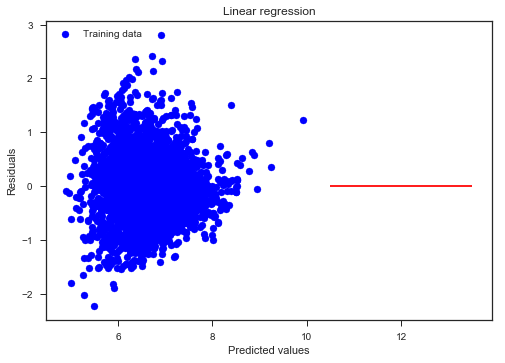

In [163]:
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
#plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [164]:

from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [165]:
from sklearn.linear_model import Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

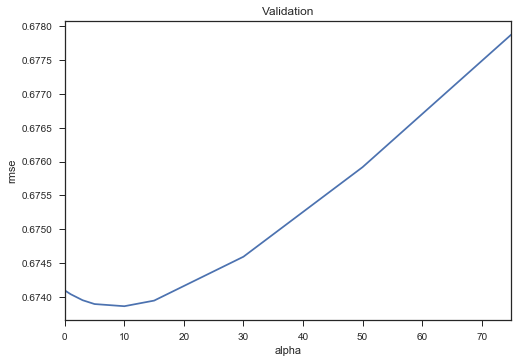

In [166]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [167]:
cv_ridge

0.05     0.674098
0.10     0.674095
0.30     0.674082
1.00     0.674043
3.00     0.673955
5.00     0.673898
10.00    0.673866
15.00    0.673949
30.00    0.674596
50.00    0.675917
75.00    0.677875
dtype: float64

In [168]:
linridge = Ridge(alpha=5).fit(X_train, y_train)

In [169]:
linridge.score(X_train, y_train)

print('IMDB dataset')

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
# print('ridge regression features: {}'
#      .format(features))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
# print('R-squared score (test): {:.3f}'
#      .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('Number of zero features: {}'
     .format(np.sum(linridge.coef_ == 0)))

IMDB dataset
ridge regression linear model intercept: 7.45654845593
ridge regression linear model coeff:
[ -6.57648060e-02   2.56845497e-01   4.20400469e-02  -1.85127650e-01
   6.87662584e-01  -1.49975613e-01   8.46047557e-03  -2.86877700e-01
   1.45352999e-08   4.88452398e-07   1.21306172e-05   4.12750532e-06
  -5.04153331e-01   1.86347074e-05  -4.82493797e-05   2.36987657e-05
  -8.05612212e-05  -7.45447590e-06   4.80377819e-02  -1.97828091e-01
  -2.26302483e-02   2.13955559e-01  -4.15350012e-02   2.74430896e-01
   2.29586445e-02  -2.32713439e-01  -6.46761013e-02  -2.34448984e-02
  -3.23841870e-02  -5.78989170e-02  -6.97358438e-03  -4.22717893e-02
   2.73012371e-03   1.60243252e-01  -4.33603364e-02  -1.37331337e-01
  -8.56679052e-02   1.06851334e-01   1.13336233e-01  -1.20323974e-01
   3.01499630e-02  -8.49776976e-02  -4.35313197e-02   1.39383284e-01
   9.49853846e-02   3.04863713e-02]
R-squared score (training): 0.490
Number of non-zero features: 46
Number of zero features: 0


## Lasso Regression

In [170]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
lasso_cv = LassoCV(alphas=alphas, random_state=0)
# lasso_cv = Lasso(alpha = 0.001)
lasso_cv.fit(X_train, y_train)
#lasso_cv.predict(X_test)
print("Training score: ",lasso_cv.score(X_train, y_train))
print("Testing score: ",lasso_cv.score(X_test, y_test))

('Training score: ', 0.48933490075174996)
('Testing score: ', 0.49090347874402057)


In [171]:

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print("Training score: ",ridge_cv.score(X_train, y_train))
print("Testing score: ",ridge_cv.score(X_test, y_test))

('Training score: ', 0.49025513808930554)
('Testing score: ', 0.49088352790566026)


In [172]:
# from sklearn import neighbors
# def func(distances):
#     w = []
#     kek = 0.0
#     for dist in distances:
#         kek += np.exp(dist)
#     for dist in distances:
#         w.append(np.exp(dist)/kek)
#     return w
# knn = neighbors.KNeighborsRegressor(n_neighbors = 3, weights = func)
# knn = knn.fit(X_train, y_train)
# print("Training score: ",knn.score(X_train, y_train))
# print("Testing score: ",knn.score(X_test, y_test))

In [173]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 90).fit(X_train)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# # plt.xlim(0,7,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In [174]:
# np.cumsum(pca.explained_variance_ratio_)

In [175]:
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

In [176]:
# plt.scatter(y_test, y_test_ - y_test, c = "blue",  label = "Training data")
# #plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

In [177]:
(data['imdb_score']).min()

1.6000000000000001

# Classifying a movie into 4 classes based on IMDB Score

In [178]:
temp_whole = pd.concat([X_train,X_test])

In [179]:
temp_whole.shape

(3167, 46)

In [180]:
target = pd.concat([y_train,y_test])

In [181]:
target_classes = pd.cut(target,bins = [0,6,10],labels = [0,1],right = True,include_lowest = True)

In [182]:
y.size

3167

In [183]:
target_classes.value_counts()

1    2334
0     833
Name: imdb_score, dtype: int64

In [184]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=9, svd_solver="full")
pca_data = pca.fit_transform(temp_whole)
# X_train = pca.transform(X_train)
# pca_data = pca.transform(num_data)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

In [185]:
cum_var_exp

array([ 0.39453388,  0.5985781 ,  0.73951702,  0.81054777,  0.87574547,
        0.93084577,  0.96549925,  0.98588809,  0.99999538])

In [186]:
target_classes.isnull().any()

False

In [187]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(temp_whole,target_classes, random_state = 1,test_size = 0.20,stratify =target_classes) # test_size = 0.10

## Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.81


In [189]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 1.0)
('Testing score: ', 0.81703470031545744)


### Feature Importance

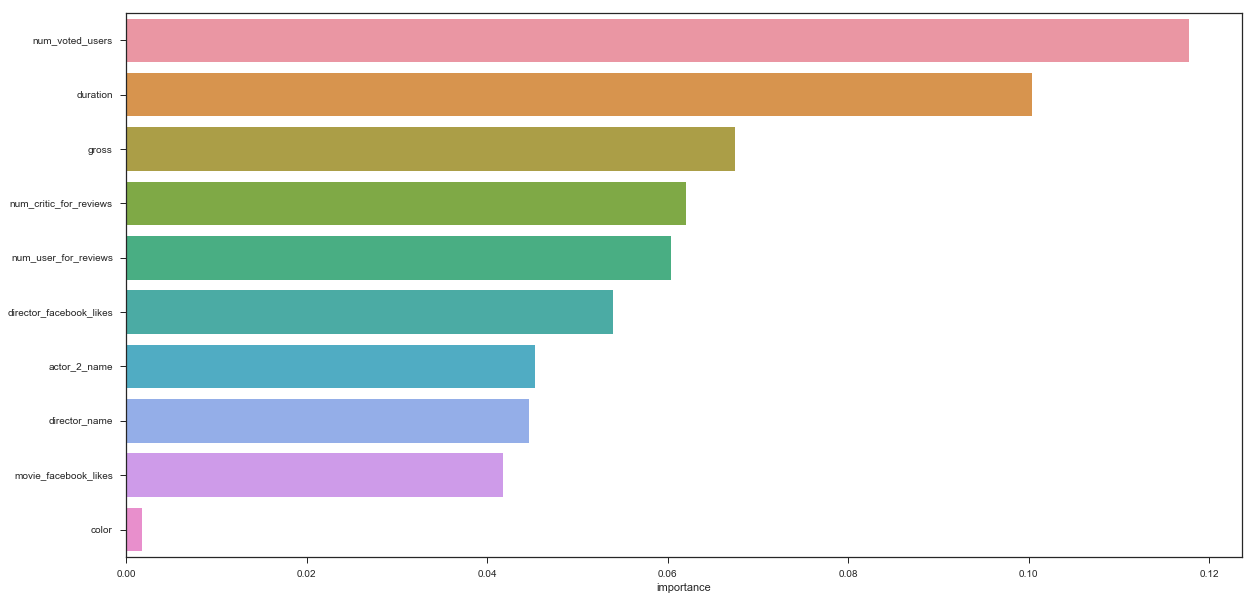

In [190]:
df = pd.DataFrame(data = dt.feature_importances_[:10],index = temp_whole.columns.tolist()[:10])

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])
plt.xlabel('importance')

In [191]:
>>> from sklearn.learning_curve import validation_curve
>>> param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
>>> train_scores, test_scores = validation_curve(
... LogisticRegression(penalty='l2', random_state=0),
... X=X_train,
... y=y_train,
... param_name='C',
... param_range=param_range,cv=10)

C:\Users\jinda\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jinda\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


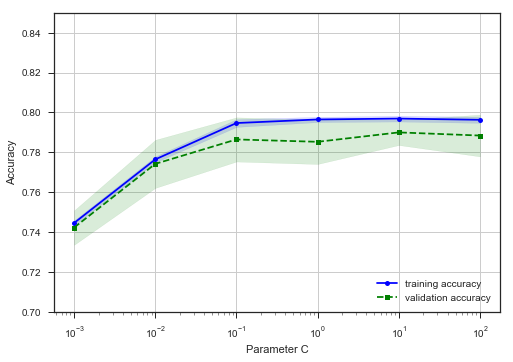

In [192]:
>>> train_mean = np.mean(train_scores, axis=1)
>>> train_std = np.std(train_scores, axis=1)
>>> test_mean = np.mean(test_scores, axis=1)
>>> test_std = np.std(test_scores, axis=1)
>>> plt.plot(param_range, train_mean,
... color='blue', marker='o',
... markersize=5,
... label='training accuracy')
>>> plt.fill_between(param_range, train_mean + train_std,
... train_mean - train_std, alpha=0.15,
... color='blue')
>>> plt.plot(param_range, test_mean,
... color='green', linestyle='--',
... marker='s', markersize=5,
... label='validation accuracy')
>>> plt.fill_between(param_range,
... test_mean + test_std,
... test_mean - test_std,
... alpha=0.15, color='green')
>>> plt.grid()
>>> plt.xscale('log')
>>> plt.legend(loc='lower right')
>>> plt.xlabel('Parameter C')
>>> plt.ylabel('Accuracy')
>>> plt.ylim([0.7, 0.85])
>>> plt.show() 

In [193]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.1,penalty='l2', random_state=0)

clf.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.81


## SVC Regularized Classifier

In [194]:
# >>> from sklearn.grid_search import GridSearchCV
# >>> from sklearn.pipeline import Pipeline
# >>> from sklearn.svm import SVC
# >>> pipe_svc = Pipeline([('clf', SVC(random_state=1))])
# >>> param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# >>> param_grid = [{'clf__C': param_range,
# ... 'clf__kernel': ['linear']},
# ... {'clf__C': param_range,
# ... 'clf__gamma': param_range,
# ... 'clf__kernel': ['rbf']}]
# >>> gs = GridSearchCV(estimator=pipe_svc,
# ... param_grid=param_grid,
# ... scoring='accuracy',
# ... cv=10,
# ... n_jobs=-1)
# >>> gs = gs.fit(X_train, y_train)


# print(gs.best_score_)
# print(gs.best_params_)

### Confusion Matrix

In [195]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)

[[ 76  91]
 [ 32 435]]


In [196]:
num_data.columns

Index([u'num_critic_for_reviews', u'duration', u'director_facebook_likes',
       u'gross', u'num_voted_users', u'num_user_for_reviews', u'imdb_score',
       u'movie_facebook_likes'],
      dtype='object')